<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation</a></span></li><li><span><a href="#Scope" data-toc-modified-id="Scope-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scope</a></span></li><li><span><a href="#Future-Work:" data-toc-modified-id="Future-Work:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Future Work:</a></span></li><li><span><a href="#Website's-permissions" data-toc-modified-id="Website's-permissions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Website's permissions</a></span></li><li><span><a href="#Page-1---Scraping-data" data-toc-modified-id="Page-1---Scraping-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Page 1 - Scraping data</a></span><ul class="toc-item"><li><span><a href="#Response" data-toc-modified-id="Response-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Response</a></span></li><li><span><a href="#Inspect-element" data-toc-modified-id="Inspect-element-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Inspect element</a></span></li><li><span><a href="#Extracting-city-links" data-toc-modified-id="Extracting-city-links-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Extracting city links</a></span></li><li><span><a href="#Extracting-city-names" data-toc-modified-id="Extracting-city-names-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Extracting city names</a></span></li></ul></li><li><span><a href="#Page-2---Scraping-data" data-toc-modified-id="Page-2---Scraping-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Page 2 - Scraping data</a></span><ul class="toc-item"><li><span><a href="#Response" data-toc-modified-id="Response-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Response</a></span></li><li><span><a href="#Inspect-element" data-toc-modified-id="Inspect-element-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Inspect element</a></span></li><li><span><a href="#Extracting-address" data-toc-modified-id="Extracting-address-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Extracting address</a></span></li><li><span><a href="#Extracting-page-3's-store-url-from-page-2" data-toc-modified-id="Extracting-page-3's-store-url-from-page-2-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Extracting page 3's store url from page 2</a></span></li><li><span><a href="#Creating-a-loop-from-city_links" data-toc-modified-id="Creating-a-loop-from-city_links-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Creating a loop from <code>city_links</code></a></span></li></ul></li><li><span><a href="#Page-3---Scraping-data" data-toc-modified-id="Page-3---Scraping-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Page 3 - Scraping data</a></span><ul class="toc-item"><li><span><a href="#Response" data-toc-modified-id="Response-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Response</a></span></li><li><span><a href="#Inspect-element" data-toc-modified-id="Inspect-element-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Inspect element</a></span></li><li><span><a href="#Extracting-geolocation" data-toc-modified-id="Extracting-geolocation-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Extracting geolocation</a></span></li><li><span><a href="#Looping-geolocation-into-the-address-dictionary" data-toc-modified-id="Looping-geolocation-into-the-address-dictionary-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Looping geolocation into the <code>address</code> dictionary</a></span></li></ul></li><li><span><a href="#Exporting-address_dict_list-into-a-dataframe" data-toc-modified-id="Exporting-address_dict_list-into-a-dataframe-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exporting <code>address_dict_list</code> into a dataframe</a></span></li><li><span><a href="#Exporting-dataframe-into-csv-file" data-toc-modified-id="Exporting-dataframe-into-csv-file-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exporting dataframe into csv file</a></span></li><li><span><a href="#Importing-dataframe-via-csv" data-toc-modified-id="Importing-dataframe-via-csv-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Importing dataframe via csv</a></span></li><li><span><a href="#Plotting-the-locations" data-toc-modified-id="Plotting-the-locations-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Plotting the locations</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

### Motivation
I currently live in a coop dorm. There was a room decorating contest and a contester asked our facebook group where she could buy fake plants from. One of the replies she got was " the dollar store, and there are 2 around us if you google them." 
That got me thinking of a location finder. Enter your address, and see what store locations are the closest to you. 

### Scope
- Getting my hands dirty with json and geolocation scraping
- Being able to successfully convert scraped data into a csv
- Learn to plot latitude and longitude data on a map (in progress)
- Build a simple search system to find the closest store location based off a given location (in progress)

**Note:** I may/may not use "City" and "Town" interchangeably. Apologies in advance. 

### Future Work:
- Include store hours (need to scrape from page 3)
- Ensure store information of cities with more than 1 store is included

In [61]:
#Importing libraries
import pandas as pd

#webscraping
import requests
from bs4 import BeautifulSoup
import json

#regex operations
import re

# adding delays - prevents spamming
import time

#map
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

### Website's permissions 
https://locations.dollartreecanada.com/robots.txt

### Page 1 - Scraping data
website that's being scraped: https://locations.dollartreecanada.com/on/

#### Response

In [62]:
#url being scraped
url1 = "https://locations.dollartreecanada.com/on/"

#requests and assign response
page1 = requests.get(url1)

# check
page1

<Response [200]>

Response object starts with the number **2**. Error free.

In [63]:
# requests correctly parse the content
page1.encoding = "ISO-885901"

# checking scraped data format
soup = BeautifulSoup(page1.text, "html.parser")
# soup = BeautifulSoup(page1.content)
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<title>Dollar Tree Locations in Ontario, ON | Dollar Store</title>
<!--<meta name="description" content="Visit your local Ontario Dollar Tree Location. Bulk supplies for households, businesses, schools, restaurants, party planners and more. " />-->
<meta content="Dollar Tree located at Ontario where Everything's $1.25 or less! Party, household &amp; cleaning supplies, as well as home decor &amp; seasonal products." name="description"/>
<meta content="" name="keywords"/>
<link href="https://locations.dollartreecanada.com/on/" rel="canonical"/>
<script type="text/javascript">
      window._wpemojiSettings = {"baseUrl":"https:\/\/s.w.org\/images\/core\/emoji\/72x72\/","ext":".png","source":{"concatemoji":"https:\/\/www.doll

#### Inspect element
Using Google Chrome's `Inspect Element` to see what element to search for in order to properly read the link. 

A snap shot of the desired string:

![](DollarTreeOntarioLocations.png)

In [64]:
dollar_tree_list = soup.find('link', href="https://locations.dollartreecanada.com/on/").text
print(dollar_tree_list)

#Out: empty

In [65]:
dollar_tree_list = soup.find_all("href")
dollar_tree_list

#Out: empty

[]

Output is empty and it's because `href` is nested inside the class `details`.

In [66]:
# Contnets under class=details
dollar_tree_list = soup.find_all(class_ = "details")

# First element present in list
dollar_tree_list[0]

<div class="details">
<h3 style="font-size:16px; font-weight:bold; padding-bottom:10px;"></h3>
<p>
<h3 style="font-size:16px; font-weight:bold; padding-bottom:10px;">Cities</h3>
<p>
<a href="https://locations.dollartreecanada.com/on/ajax/" linktrack="City index page - Ajax">Ajax</a><br/>
<a href="https://locations.dollartreecanada.com/on/amherstburg/" linktrack="City index page - Amherstburg">Amherstburg</a><br/>
<a href="https://locations.dollartreecanada.com/on/ancaster/" linktrack="City index page - Ancaster">Ancaster</a><br/>
<a href="https://locations.dollartreecanada.com/on/aurora/" linktrack="City index page - Aurora">Aurora</a><br/>
<a href="https://locations.dollartreecanada.com/on/barrie/" linktrack="City index page - Barrie">Barrie</a><br/>
<a href="https://locations.dollartreecanada.com/on/belleville/" linktrack="City index page - Belleville">Belleville</a><br/>
<a href="https://locations.dollartreecanada.com/on/bolton/" linktrack="City index page - Bolton">Bolton</a><br/>


This would've been easier to extract if the information present in `dollar_tree_list` were separated by commas.  Time to add elbow grease into regex.

#### Extracting city links

In [67]:
# Converting url into string
jumbled_links = str(dollar_tree_list[0])
# Regex url pattern
links_pattern = '(?<=href=")(.*)(?=" link)'

# Extract
city_links = re.findall(links_pattern,jumbled_links)
# Check
city_links

['https://locations.dollartreecanada.com/on/ajax/',
 'https://locations.dollartreecanada.com/on/amherstburg/',
 'https://locations.dollartreecanada.com/on/ancaster/',
 'https://locations.dollartreecanada.com/on/aurora/',
 'https://locations.dollartreecanada.com/on/barrie/',
 'https://locations.dollartreecanada.com/on/belleville/',
 'https://locations.dollartreecanada.com/on/bolton/',
 'https://locations.dollartreecanada.com/on/bowmanville/',
 'https://locations.dollartreecanada.com/on/bracebridge/',
 'https://locations.dollartreecanada.com/on/brampton/',
 'https://locations.dollartreecanada.com/on/brantford/',
 'https://locations.dollartreecanada.com/on/brockville/',
 'https://locations.dollartreecanada.com/on/burlington/',
 'https://locations.dollartreecanada.com/on/cambridge/',
 'https://locations.dollartreecanada.com/on/carleton-place/',
 'https://locations.dollartreecanada.com/on/chatham/',
 'https://locations.dollartreecanada.com/on/cobourg/',
 'https://locations.dollartreecanada.

#### Extracting city names

In [68]:
# Concerting url into string
jumbled_city = str(dollar_tree_list[0])
# Regex pattern
city_pattern = '(?<=\/on\/)(.*)(?=\/" link)'

# Extract
city_names = re.findall(city_pattern,jumbled_city)
# Check
city_names

['ajax',
 'amherstburg',
 'ancaster',
 'aurora',
 'barrie',
 'belleville',
 'bolton',
 'bowmanville',
 'bracebridge',
 'brampton',
 'brantford',
 'brockville',
 'burlington',
 'cambridge',
 'carleton-place',
 'chatham',
 'cobourg',
 'collingwood',
 'cornwall',
 'east-gwillimbury',
 'east-whitby',
 'essex',
 'etobicoke',
 'exeter',
 'grand-bend',
 'guelph',
 'hamilton',
 'hannon',
 'hawkesbury',
 'huntsville',
 'kapuskasing',
 'kemptville',
 'kingston',
 'kitchener',
 'lasalle',
 'leamington',
 'london',
 'markham',
 'midland',
 'mississauga',
 'nepean',
 'niagara-falls',
 'north-bay',
 'north-york',
 'orangeville',
 'orillia',
 'orleans',
 'oshawa',
 'ottawa',
 'ottawa-(gloucester)',
 'owen-sound',
 'parry-sound',
 'peterborough',
 'pickering',
 'port-elgin',
 'port-perry',
 'rockland',
 'sarnia',
 'sault-sainte-marie',
 'sault-ste-marie',
 'scarborough',
 'simcoe',
 'st.-catharines',
 'stittsville',
 'strathroy',
 'st-thomas',
 'sudbury',
 'tillsonburg',
 'timmins',
 'toronto',
 'tren

In [69]:
len(city_names)

79

There happens to be 79 cities in Ontario that has at least 1 Dollar Tree store (data scraped on 15th Nov 2021).

### Page 2 - Scraping data

While there are multiple links to go through, the example link that'll be used: https://locations.dollartreecanada.com/on/ajax/
Not only is it the first link, but also happens to be city I used to commute from for university (wouldn't recommend 3-4 hour daily commutes).

#### Response

In [70]:
# Example to see what we're going to work with
city_links[0]

'https://locations.dollartreecanada.com/on/ajax/'

In [71]:
#url being scraped
url2 = city_links[0]

#requests and assign response
page2 = requests.get(url2)

# check
page2

<Response [200]>

Response object starts with the number **2**. Error free.

In [72]:
# requests correctly parse the content
page2.encoding = "ISO-885901"

# checking scraped data format
soup2 = BeautifulSoup(page2.text, "html.parser")
# soup = BeautifulSoup(page1.content)
soup2

<!DOCTYPE html>

<html lang="en">
<head>
<meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<title>Dollar Tree Locations in Ajax, ON | Dollar Store</title>
<link href="//www.dollartreecanada.com//assets/images/dt/images/favicon.ico" rel="SHORTCUT ICON"/>
<!--<meta name="description" content="Visit your local Ajax, ON Dollar Tree Location. Bulk supplies for households, businesses, schools, restaurants, party planners and more." />-->
<meta content="Dollar Tree located in Ajax, ON where Everything's $1.25 or less! Party, household &amp; cleaning supplies, as well as home decor &amp; seasonal products." name="description"/>
<meta content="" name="keywords"/>
<link href="https://locations.dollartreecanada.com/on/ajax/" rel="canonical"/>
<script type="text/javascript">
            window._wpemojiSettings = {"baseUrl

#### Inspect element
Using Google Chrome's `Inspect Element` to see what element to search for in order to properly read the link. 

A snap shot of the desired string:

![](DollarTreeOntarioLocations2.png)

The address information (2) is nested within type="application/ld+json" (1). On top of that (3) shows that link to the 3rd page that'll allow me to get the store's geolocation.

#### Extracting address

In [73]:
# Data under "application/ld+json"
dollar_tree_address = soup2.find_all(type="application/ld+json")

print(dollar_tree_address[1])

<script type="application/ld+json">
                                {
                                    "@context":"//schema.org",
                                    "@type":"Store",
                                    "name": "Dollar Tree",
                                  "address":{
                                    "@type":"PostalAddress",
                                    "streetAddress":"163 Harwood Ave N.",
                                    "addressLocality":"Ajax",
                                    "addressRegion":"ON",
                                    "postalCode":"L1Z 0A1",
                                    "addressCountry":"CA"
                                  },
                                  "containedin" : "Ajax",
                                  "logo" : "//www.dollartreecanada.com/img/shared/logo.png",
                                  "image":"//www.dollartree.com/assets/images/storelocator/_localPages/dollar-tree-canada-store-image.jpg",
        

Address information is present as the 2nd element in the list.

In [74]:
# Attaining the 1st element in the list
dollar_tree_address_content = dollar_tree_address[1].contents[0]

# check
dollar_tree_address_content

'\n                                {\n                                    "@context":"//schema.org",\n                                    "@type":"Store",\n                                    "name": "Dollar Tree",\n                                  "address":{\n                                    "@type":"PostalAddress",\n                                    "streetAddress":"163 Harwood Ave N.",\n                                    "addressLocality":"Ajax",\n                                    "addressRegion":"ON",\n                                    "postalCode":"L1Z 0A1",\n                                    "addressCountry":"CA"\n                                  },\n                                  "containedin" : "Ajax",\n                                  "logo" : "//www.dollartreecanada.com/img/shared/logo.png",\n                                  "image":"//www.dollartree.com/assets/images/storelocator/_localPages/dollar-tree-canada-store-image.jpg",\n                          

Extracted the chunk containing more than the address and it seems to be in json format.

In [75]:
# json format to an easier read
address_json = json.loads(dollar_tree_address_content)

# Check
address_json

{'@context': '//schema.org',
 '@type': 'Store',
 'name': 'Dollar Tree',
 'address': {'@type': 'PostalAddress',
  'streetAddress': '163 Harwood Ave N.',
  'addressLocality': 'Ajax',
  'addressRegion': 'ON',
  'postalCode': 'L1Z 0A1',
  'addressCountry': 'CA'},
 'containedin': 'Ajax',
 'logo': '//www.dollartreecanada.com/img/shared/logo.png',
 'image': '//www.dollartree.com/assets/images/storelocator/_localPages/dollar-tree-canada-store-image.jpg',
 'branchOf': {'name': 'DollarTree', 'url': '//www.dollartreecanada.com/'},
 'url': 'https://locations.dollartreecanada.com/on/ajax/',
 'telephone': '905-426-6400'}

In [76]:
print(type(address_json))
print(address_json.keys())

<class 'dict'>
dict_keys(['@context', '@type', 'name', 'address', 'containedin', 'logo', 'image', 'branchOf', 'url', 'telephone'])


The address is present in the `address` key within a dictionary. I plan to isolate `address` into a separate dictionary in which I can add page 3's website link and geolocation information into.
the url of the store is present in the `url` key within the same dictionary. I plan to add that into the created dictionary called `address`.

In [77]:
# new dictionary - address
address = address_json["address"]

# Check
address

{'@type': 'PostalAddress',
 'streetAddress': '163 Harwood Ave N.',
 'addressLocality': 'Ajax',
 'addressRegion': 'ON',
 'postalCode': 'L1Z 0A1',
 'addressCountry': 'CA'}

#### Extracting page 3's store url from page 2

In [78]:
# Information under class=details
page3_url = soup2.find_all(class_ = "details")

# 1st item in the list
page3_url[0]

<div class="details">
<h3 style="font-size:16px; font-weight:bold; padding-bottom:10px;">Ajax</h3>
<p>
<script type="application/ld+json">
                                {
                                    "@context":"//schema.org",
                                    "@type":"Store",
                                    "name": "Dollar Tree",
                                  "address":{
                                    "@type":"PostalAddress",
                                    "streetAddress":"163 Harwood Ave N.",
                                    "addressLocality":"Ajax",
                                    "addressRegion":"ON",
                                    "postalCode":"L1Z 0A1",
                                    "addressCountry":"CA"
                                  },
                                  "containedin" : "Ajax",
                                  "logo" : "//www.dollartreecanada.com/img/shared/logo.png",
                                  "image":"//

In [79]:
# Convert above into a string
jumbled_page3 = str(page3_url[0])

# Regex pattern
page3_url_pattern = '(?<=href=")(.*)(?=" link)'

In [80]:
# Extracting as a list
page3_url_link = re.findall(page3_url_pattern,jumbled_page3)

#1st item in the list
page3_url_link[0]

'https://locations.dollartreecanada.com/on/ajax/40264/'

#### Creating a loop from `city_links`

In [81]:
# Will contain the list of dictionaries of store locations
address_dict_list = []
# Will contain all the links to the respective stores 
page3_url_links = []

# For loop that has the same workflow used for the example link above
for city_link in city_links:
    address_page = requests.get(city_link)
    address_soup = BeautifulSoup(address_page.text, "html.parser")
    
    # Page 2 address
    address_info = address_soup.find_all(type="application/ld+json")
    # Page 3 url
    page3_url = address_soup.find_all(class_ = "details")
    
    # Page 2
    address_content = address_info[1].contents[0]
    # Page 3
    jumbled_page3 = str(page3_url[0])
    page3_url_pattern = '(?<=href=")(.*)(?=" link)'
    page3_url_link = re.findall(page3_url_pattern,jumbled_page3)
    
    # Page 2
    address_json = json.loads(address_content)
    
    # address dictionary
    address = address_json["address"]
    
    #address["url"] = page3_url_link[0]
    
    page3_url_links.append(page3_url_link[0])
    address_dict_list.append(address)

In [82]:
# Check
address_dict_list

[{'@type': 'PostalAddress',
  'streetAddress': '163 Harwood Ave N.',
  'addressLocality': 'Ajax',
  'addressRegion': 'ON',
  'postalCode': 'L1Z 0A1',
  'addressCountry': 'CA'},
 {'@type': 'PostalAddress',
  'streetAddress': '400 Sandwich St South',
  'addressLocality': 'Amherstburg',
  'addressRegion': 'ON',
  'postalCode': 'N9V 3L4',
  'addressCountry': 'CA'},
 {'@type': 'PostalAddress',
  'streetAddress': 'B2-1110 Wilson Street W. RR1',
  'addressLocality': 'Ancaster',
  'addressRegion': 'ON',
  'postalCode': 'L9G 3K9',
  'addressCountry': 'CA'},
 {'@type': 'PostalAddress',
  'streetAddress': '15340 Bayview Avenue',
  'addressLocality': 'Aurora',
  'addressRegion': 'ON',
  'postalCode': 'L4G 7J1',
  'addressCountry': 'CA'},
 {'@type': 'PostalAddress',
  'streetAddress': '320 Yonge Street',
  'addressLocality': 'Barrie',
  'addressRegion': 'ON',
  'postalCode': 'L4N 4C8',
  'addressCountry': 'CA'},
 {'@type': 'PostalAddress',
  'streetAddress': '11-366 North Front St.',
  'addressLoca

**Note:** I am aware that Pickering has 2 stores. The generated list contains only the first store. That being said, I assume there are cities in this list that contain more than 1 store. This will be an issue to fix in the future.

In [83]:
# Check
page3_url_links

['https://locations.dollartreecanada.com/on/ajax/40264/',
 'https://locations.dollartreecanada.com/on/amherstburg/40208/',
 'https://locations.dollartreecanada.com/on/ancaster/40063/',
 'https://locations.dollartreecanada.com/on/aurora/40195/',
 'https://locations.dollartreecanada.com/on/barrie/40086/',
 'https://locations.dollartreecanada.com/on/belleville/40067/',
 'https://locations.dollartreecanada.com/on/bolton/40257/',
 'https://locations.dollartreecanada.com/on/bowmanville/40180/',
 'https://locations.dollartreecanada.com/on/bracebridge/40171/',
 'https://locations.dollartreecanada.com/on/brampton/40105/',
 'https://locations.dollartreecanada.com/on/brantford/40088/',
 'https://locations.dollartreecanada.com/on/brockville/40065/',
 'https://locations.dollartreecanada.com/on/burlington/40160/',
 'https://locations.dollartreecanada.com/on/cambridge/40087/',
 'https://locations.dollartreecanada.com/on/carleton-place/40175/',
 'https://locations.dollartreecanada.com/on/chatham/40110

Only contains the url of first listed store even when more than 1 store exists in a certain city. The good thing is that goes hand in hand with `address_dict_list`.

### Page 3 - Scraping data

While there are multiple links to go through, the example link that'll be used: https://locations.dollartreecanada.com/on/ajax/40264/

#### Response

In [84]:
# Example to see what we're going to work with
page3_url_links[0]

'https://locations.dollartreecanada.com/on/ajax/40264/'

In [85]:
#url being scraped
url3 = page3_url_links[0]

#requests and assign response
page3 = requests.get(url3)

# check
page3

<Response [200]>

Response object starts with the number **2**. Error free.

In [86]:
# requests correctly parse the content
page3.encoding = "ISO-885901"

# checking scraped data format
soup3 = BeautifulSoup(page3.text, "html.parser")
# soup = BeautifulSoup(page1.content)
soup3

<!DOCTYPE html>

<html lang="en">
<head>
<meta content="telephone=no" name="format-detection"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width" name="viewport"/>
<title>Dollar Tree - Dollar Store at RioCan Durham Annex Centre in Ajax, ON</title>
<!-- <meta name="keywords" content="Dollar Store Canada, Dollar Giant, Dollar Tree Canada, Discount Retailer" /> -->
<!--<meta name="description" content="Dollar Tree located in Ajax, ON where Everything's $1.25 or less!  Party, household & cleaning supplies, as well as home decor & seasonal products" />-->
<meta content="Dollar Tree located at RioCan Durham Annex Centre in Ajax, ON where Everything's $1.25 or less! Party, household &amp; cleaning supplies, as well as home decor &amp; seasonal products." name="description"/>
<link href="https://locations.dollartreecanada.com/on/ajax/40264/" rel="canonical"/>
<!-- Non-Restaurant Set -->
<meta content="595220237267758" property="fb:app_id"/>

Above is definitely hard on the eyes.

#### Inspect element
Using Google Chrome's `Inspect Element` to see what element to search for in order to properly read the link. 

A snap shot of the desired string:

![](DollarTreeOntarioLocations3.png)

Geolocation data (2) which is `latitude` and `longitude` is present under `application/ld+json` (1).

#### Extracting geolocation

In [87]:
store_lats_longs = soup3.find_all(type="application/ld+json")

# Extracting first item in the list
print(store_lats_longs[0])

<script type="application/ld+json">
{
  "@context":"http://schema.org",
  "@type":"Store",
  "@id":"40264",
  "name": "Dollar Tree",
  "address":{
    "@type":"PostalAddress",
    "streetAddress":"163 Harwood Ave N.",
    "addressLocality":"Ajax",
    "addressRegion":"",
    "postalCode":"L1Z 0A1",
    "addressCountry":"CA"
  },
"containedIn":"RioCan Durham Annex Centre",  
"geo":{
    "@type":"GeoCoordinates",
    "latitude":43.8670422,
    "longitude":-79.0247397
  },
"branchOf": {
    "name":"DollarTree",
    "url": "http://www.dollartreecanada.com/"
  },
 "url":"https://locations.dollartreecanada.com/on/ajax/40264",
  "telephone":"905-426-6400",
  "logo" : "https://www.dollartreecanada.com/img/shared/logo.png",
  "image":"https://hosted.where2getit.com/dollartreeca/images/925x925_StoreFront_DTCanada.jpg",
  "openingHoursSpecification":[ 
            {
              "@type":"OpeningHoursSpecification",
              "dayOfWeek":[
                "Monday"
              ],
           

Present as the first item in the list.

In [88]:
# First item 
store_lats_longs_content = store_lats_longs[0].contents[0]

store_lats_longs_content

'\n{\n  "@context":"http://schema.org",\n  "@type":"Store",\n  "@id":"40264",\n  "name": "Dollar Tree",\n  "address":{\n    "@type":"PostalAddress",\n    "streetAddress":"163 Harwood Ave N.",\n    "addressLocality":"Ajax",\n    "addressRegion":"",\n    "postalCode":"L1Z 0A1",\n    "addressCountry":"CA"\n  },\n"containedIn":"RioCan Durham Annex Centre",  \n"geo":{\n    "@type":"GeoCoordinates",\n    "latitude":43.8670422,\n    "longitude":-79.0247397\n  },\n"branchOf": {\n    "name":"DollarTree",\n    "url": "http://www.dollartreecanada.com/"\n  },\n "url":"https://locations.dollartreecanada.com/on/ajax/40264",\n  "telephone":"905-426-6400",\n  "logo" : "https://www.dollartreecanada.com/img/shared/logo.png",\n  "image":"https://hosted.where2getit.com/dollartreeca/images/925x925_StoreFront_DTCanada.jpg",\n  "openingHoursSpecification":[ \n            {\n              "@type":"OpeningHoursSpecification",\n              "dayOfWeek":[\n                "Monday"\n              ],\n           

Extracted the chunk containing more than the address and it seems to be in json format.

In [89]:
# json format
store_lats_longs_json = json.loads(store_lats_longs_content)
store_lats_longs_json

{'@context': 'http://schema.org',
 '@type': 'Store',
 '@id': '40264',
 'name': 'Dollar Tree',
 'address': {'@type': 'PostalAddress',
  'streetAddress': '163 Harwood Ave N.',
  'addressLocality': 'Ajax',
  'addressRegion': '',
  'postalCode': 'L1Z 0A1',
  'addressCountry': 'CA'},
 'containedIn': 'RioCan Durham Annex Centre',
 'geo': {'@type': 'GeoCoordinates',
  'latitude': 43.8670422,
  'longitude': -79.0247397},
 'branchOf': {'name': 'DollarTree', 'url': 'http://www.dollartreecanada.com/'},
 'url': 'https://locations.dollartreecanada.com/on/ajax/40264',
 'telephone': '905-426-6400',
 'logo': 'https://www.dollartreecanada.com/img/shared/logo.png',
 'image': 'https://hosted.where2getit.com/dollartreeca/images/925x925_StoreFront_DTCanada.jpg',
 'openingHoursSpecification': [{'@type': 'OpeningHoursSpecification',
   'dayOfWeek': ['Monday'],
   'opens': 'Mon: 9:00am - 9:00pm'},
  {'@type': 'OpeningHoursSpecification',
   'dayOfWeek': ['Tuesday'],
   'opens': 'Tue: 9:00am - 9:00pm'},
  {'@t

In [91]:
print(type(store_lats_longs_json))
print(store_lats_longs_json.keys())
print("Number of keys in store_lats_longs_json: ",len(store_lats_longs_json.keys()))

<class 'dict'>
dict_keys(['@context', '@type', '@id', 'name', 'address', 'containedIn', 'geo', 'branchOf', 'url', 'telephone', 'logo', 'image', 'openingHoursSpecification'])
Number of keys in store_lats_longs_json:  13


In [92]:
store_lats_longs_json["geo"]

{'@type': 'GeoCoordinates', 'latitude': 43.8670422, 'longitude': -79.0247397}

`store_lats_longs_json` dictionary that has 13 keys. Out of which, the latitude and longitude is present in the `geo` key.

In [44]:
list(store_lats_longs_json["geo"].values())

['GeoCoordinates', 43.8670422, -79.0247397]

Game plan would be to isolate the respective values within the list above into respect latitude and longitude lists. Then append those lists into `address_dict_list`.

In [93]:
# List to contain latitudes
lats = []
# List to contain longitudes
longs = []

# for loop workflow follows the example I worked with above
for page3_url_link in page3_url_links:

    #requests and assign response
    geo_page = requests.get(page3_url_link)
    
    # checking scraped data format
    geo_soup = BeautifulSoup(geo_page.text, "html.parser")

    geo_info = geo_soup.find_all(type="application/ld+json")
    
    geo_content = geo_info[0].contents[0]
    
    geo_json = json.loads(geo_content)
    
    lats.append(list(geo_json["geo"].values())[1])
    longs.append(list(geo_json["geo"].values())[2])

In [95]:
# Check
print(lats)
print("length of lats:", len(lats))

[43.8670422, 42.09741, 43.1968684, 44.0078246575343, 44.3700857142857, 44.1702431818182, 43.8722244, 43.9094406676064, 45.0477821, 43.66767, 43.1660866666667, 44.611302, 43.35219, 43.3740316962253, 45.14663, 42.41677, 43.9747846188625, 44.50009, 45.06209, 44.0692535, 43.9217563528371, 42.175205, 43.7294477777778, 43.3513859375, 43.310691, 43.5409392857143, 43.2359375, 43.19027, 45.5986566666667, 45.3359884, 49.3995710381591, 45.00355, 44.23166375, 43.4148333333333, 42.2477423076923, 42.03658, 42.9883041444404, 43.8689646651735, 44.74908, 43.6061033, 45.3621088281692, 43.11518, 46.3325415130661, 43.73897, 43.9217, 44.6098749, 45.43988, 43.9434033, 45.416943902439, 45.42379, 44.5766641395434, 45.3440321, 44.2856, 43.84316, 44.4273577966102, 44.10155, 45.5440913357628, 42.97806, 46.5246533333333, 46.5186175, 43.70107, 42.8488261538462, 43.1517211, 45.26463, 42.9470654794521, 42.7787918387919, 46.5011406, 42.86217, 48.47252, 43.61729, 44.1004255555556, 46.6140311, 42.5854654, 44.52313, 43.

In [97]:
# Check
print(longs)
print("length of longs:", len(longs))

[-79.0247397, -83.10814, -80.0163169, -79.4444417808219, -79.6690985714286, -77.3872595454546, -79.7253523, -78.7149286788838, -79.2909339, -79.73528, -80.2750966666667, -75.6867674, -79.79, -80.3186323001797, -76.14595, -82.20213, -78.198886406334, -80.23422, -74.76608, -79.4885102, -78.9283253180843, -82.822615, -79.5753111111111, -81.4814196875, -81.7524235, -80.2817671428571, -79.79922, -79.84358, -74.6116966666667, -79.2325584, -82.3769178767087, -76.46254, -76.48327125, -80.4787766666667, -83.0607484615385, -82.60093, -81.3269366343098, -79.2129378554576, -79.88268, -79.5874693, -75.7337796693791, -79.10293, -79.4735143493911, -79.53948, -80.0846301662963, -79.4535618, -75.54122, -78.8441189, -75.6012068292683, -75.60041, -80.8997548332625, -80.009399, -78.32956, -79.06844, -81.395843220339, -78.9371225, -75.3018212585169, -82.37584, -84.31947, -84.2798447, -79.24699, -80.2893146153846, -79.2692157, -75.9423, -81.6128139726027, -81.2085545759949, -80.9431851, -80.72937, -81.39333

Everything seems to check out. Time to merge it into `address_dict_list`

#### Looping geolocation into the `address` dictionary

In [49]:
# Check to make sure I'm using the right dictionary list
address_dict_list

[{'@type': 'PostalAddress',
  'streetAddress': '163 Harwood Ave N.',
  'addressLocality': 'Ajax',
  'addressRegion': 'ON',
  'postalCode': 'L1Z 0A1',
  'addressCountry': 'CA'},
 {'@type': 'PostalAddress',
  'streetAddress': '400 Sandwich St South',
  'addressLocality': 'Amherstburg',
  'addressRegion': 'ON',
  'postalCode': 'N9V 3L4',
  'addressCountry': 'CA'},
 {'@type': 'PostalAddress',
  'streetAddress': 'B2-1110 Wilson Street W. RR1',
  'addressLocality': 'Ancaster',
  'addressRegion': 'ON',
  'postalCode': 'L9G 3K9',
  'addressCountry': 'CA'},
 {'@type': 'PostalAddress',
  'streetAddress': '15340 Bayview Avenue',
  'addressLocality': 'Aurora',
  'addressRegion': 'ON',
  'postalCode': 'L4G 7J1',
  'addressCountry': 'CA'},
 {'@type': 'PostalAddress',
  'streetAddress': '320 Yonge Street',
  'addressLocality': 'Barrie',
  'addressRegion': 'ON',
  'postalCode': 'L4N 4C8',
  'addressCountry': 'CA'},
 {'@type': 'PostalAddress',
  'streetAddress': '11-366 North Front St.',
  'addressLoca

In [50]:
# Counter for lats and lon
counter = 0
for address_dict in address_dict_list:
    
    address_dict["latitude"] = lats[counter]
    address_dict["longitude"] = longs[counter]
    
    counter = counter+1

In [51]:
# Check
address_dict_list

[{'@type': 'PostalAddress',
  'streetAddress': '163 Harwood Ave N.',
  'addressLocality': 'Ajax',
  'addressRegion': 'ON',
  'postalCode': 'L1Z 0A1',
  'addressCountry': 'CA',
  'latitude': 43.8670422,
  'longitude': -79.0247397},
 {'@type': 'PostalAddress',
  'streetAddress': '400 Sandwich St South',
  'addressLocality': 'Amherstburg',
  'addressRegion': 'ON',
  'postalCode': 'N9V 3L4',
  'addressCountry': 'CA',
  'latitude': 42.09741,
  'longitude': -83.10814},
 {'@type': 'PostalAddress',
  'streetAddress': 'B2-1110 Wilson Street W. RR1',
  'addressLocality': 'Ancaster',
  'addressRegion': 'ON',
  'postalCode': 'L9G 3K9',
  'addressCountry': 'CA',
  'latitude': 43.1968684,
  'longitude': -80.0163169},
 {'@type': 'PostalAddress',
  'streetAddress': '15340 Bayview Avenue',
  'addressLocality': 'Aurora',
  'addressRegion': 'ON',
  'postalCode': 'L4G 7J1',
  'addressCountry': 'CA',
  'latitude': 44.0078246575343,
  'longitude': -79.4444417808219},
 {'@type': 'PostalAddress',
  'streetAdd

Seems like `latitude` and `longitude` have been aded to `address_dict_list`.

### Exporting `address_dict_list` into a dataframe

In [52]:
stores_df = pd.DataFrame.from_records(address_dict_list)
stores_df.drop(["@type"], axis=1, inplace=True)

In [53]:
stores_df

,streetAddress,addressLocality,addressRegion,postalCode,addressCountry,latitude,longitude
0,163 Harwood Ave N.,Ajax,ON,L1Z 0A1,CA,43.867042,-79.024740
1,400 Sandwich St South,Amherstburg,ON,N9V 3L4,CA,42.097410,-83.108140
2,B2-1110 Wilson Street W. RR1,Ancaster,ON,L9G 3K9,CA,43.196868,-80.016317
3,15340 Bayview Avenue,Aurora,ON,L4G 7J1,CA,44.007825,-79.444442
4,320 Yonge Street,Barrie,ON,L4N 4C8,CA,44.370086,-79.669099
...,...,...,...,...,...,...,...
74,100 Dundas Street East,Waterdown,ON,L0R 2H2,CA,43.318680,-79.910070
75,585 Weber Street N.,Waterloo,ON,N2V 1V8,CA,43.496600,-80.549860
76,23-200 Fitch Street,Welland,ON,L3C 4V9,CA,42.994805,-79.254849
77,19 Amy Croft Dr,Windsor,ON,N9K 1C7,CA,42.307193,-82.868155


### Exporting dataframe into csv file

In [54]:
stores_df.to_csv(r"C:\Users\gsagararatne\Documents\BrainStation files\portfolio projects\webscrapping\DollarTreeOntarioLocations.csv", index=False, header=True)

### Importing dataframe via csv
This is mainly to skip running the entire document.

In [39]:
stores_df = pd.read_csv("DollarTreeOntarioLocations.csv")
stores_df.head()

,streetAddress,addressLocality,addressRegion,postalCode,addressCountry,latitude,longitude
0,163 Harwood Ave N.,Ajax,ON,L1Z 0A1,CA,43.867042,-79.024740
1,400 Sandwich St South,Amherstburg,ON,N9V 3L4,CA,42.097410,-83.108140
2,B2-1110 Wilson Street W. RR1,Ancaster,ON,L9G 3K9,CA,43.196868,-80.016317
3,15340 Bayview Avenue,Aurora,ON,L4G 7J1,CA,44.007825,-79.444442
4,320 Yonge Street,Barrie,ON,L4N 4C8,CA,44.370086,-79.669099


### Plotting the locations

Note: Tried using [OpenStreetMap](https://www.openstreetmap.org/) to attain the map of Ontario, but it happened to be too large. Hence the boundary information present below.

In [98]:
# Boundary box
print(stores_df.longitude.min(),",",stores_df.longitude.max())
print(stores_df.latitude.min(),",",stores_df.latitude.max())

-84.31947 , -74.6116966666667
42.03658 , 49.3995710381591


My next approach is to work with .shp files. I found a .shp file through the website [2011 Census - Boundary files](https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2011-eng.cfm). 

<AxesSubplot:>

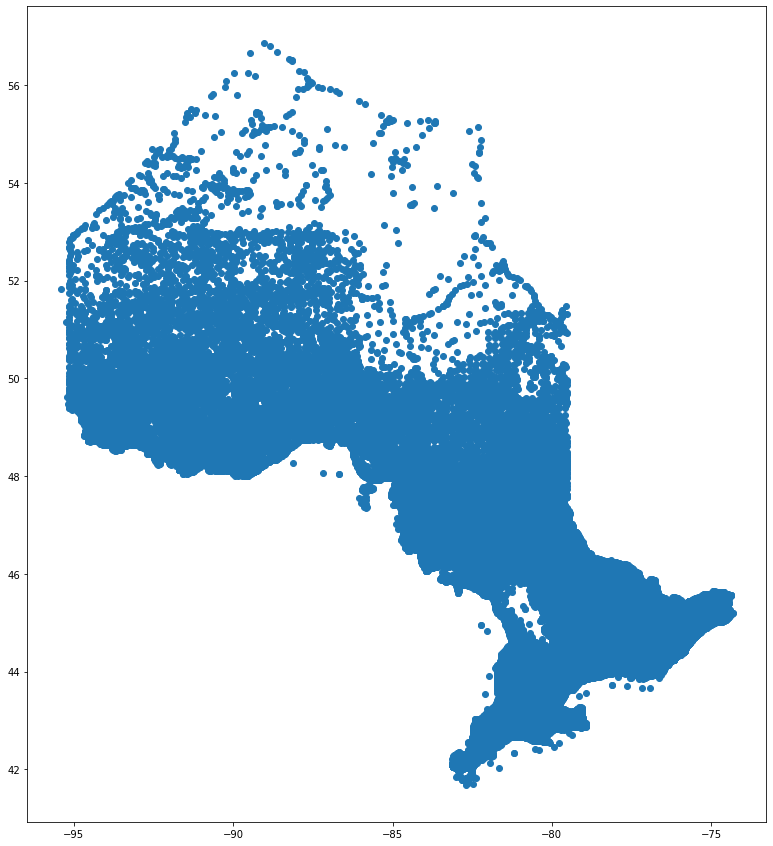

In [44]:
ontario_map = gpd.read_file("cgn_on_shp_eng/cgn_on_shp_eng.shp")

fig,ax = plt.subplots(figsize = (15,15))
ontario_map.plot(ax=ax)

### Summary
Definitely a nice json and regex warmup for my fitbit sleep analysis project that I'm currently working on. This project does need more work in order to improve its accuracy. Enjoyed webscraping nonetheless.

**Note:** Future work can be found at the top of this notebook.